# Real Estate Investment Trusts Portfolio

To create a REIT portfolio in addition to accessing each REIT, three key aspects will be crucial:


1.   Dividend Yield: Percent of the share value paid in dividends
2.   Price-to-Book Ratio (P/B): Compares REIT's market price to its book value
3.  Time Series Analysis: Forecast of the value of the fund’s share in the coming months

The following model incorporates these three key aspects to guide the creation of a REIT portfolio.

## Imports

In [1]:
!pip install numpy==1.24.3
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Necessary libraries for model
import yfinance as yf
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Collection

The selected list of REITs comprises companies that are prominent within the S&P 500 index, representing various sectors of the real estate market.  The yfinance library is used to retrieve historical market data for REITs. With this library, information about the REITs' stock price, dividend yield, and price-to-book ratio are retrieved. In addition, the median stock price and the 95th percentile of the stock price over the past five years is collected.

In [3]:
# List of REITs tickers
reits = [
    "AMT", "PLD", "CCI", "DLR", "EQIX", "PSA", "SPG", "AVB", "EQR", "NNN",
    "ESS", "EXR", "MAA", "O", "REG", "VTR", "WELL", "HST", "UDR", "BXP",
    "ARE", "KIM", "SLG", "FRT"
]
# Initialize lists to store results
current_prices = {}
dividend_yields = {}
pb_ratios = {}
medians = {}
q95s = {}

# Loop through each REIT
for ticker in reits:
  # Fetch historical data
  reit = yf.Ticker(ticker)
  hist = reit.history(period="5y", interval="1mo")

  info = reit.info
  current_price = info.get('currentPrice', np.nan)
  current_prices[ticker] = current_price

  # Fetch dividend yield
  dividend_yield = info.get('dividendYield', np.nan)
  dividend_yields[ticker] = dividend_yield

  # Fetch price-to-book ratio
  pb_ratio = info.get('priceToBook', np.nan)
  pb_ratios[ticker] = pb_ratio

  # Fetch median price over past 5 years
  med = hist['Close'].median(skipna=True)
  medians[ticker] = med

  # Fetch q95 price over past 5 years
  q95 = hist['Close'].quantile(0.95)
  q95s[ticker] = q95


reit_data = pd.DataFrame({
    'Current Price': current_prices,
    'Dividend Yield': dividend_yields,
    'P/B Ratio': pb_ratios,
    'Median Price': medians,
    '95th Percentile Price': q95s
})

display(reit_data)

,Current Price,Dividend Yield,P/B Ratio,Median Price,95th Percentile Price
AMT,207.10,0.0313,26.575132,208.807472,257.580165
PLD,112.00,0.0343,1.956845,112.470001,145.472347
CCI,101.85,0.0615,8.365502,129.846413,166.792777
DLR,192.69,0.0253,3.112321,126.439690,161.481317
EQIX,985.00,0.0173,6.994447,702.027130,884.460245
PSA,334.00,0.0359,11.118879,271.684998,340.313272
SPG,183.84,0.0457,22.446888,105.224915,167.023997
AVB,226.55,0.0300,2.707758,176.806206,225.782332
EQR,73.75,0.0366,2.581741,62.191769,77.109265
NNN,42.50,0.0546,1.824191,38.875462,43.776789


## Data Visualization


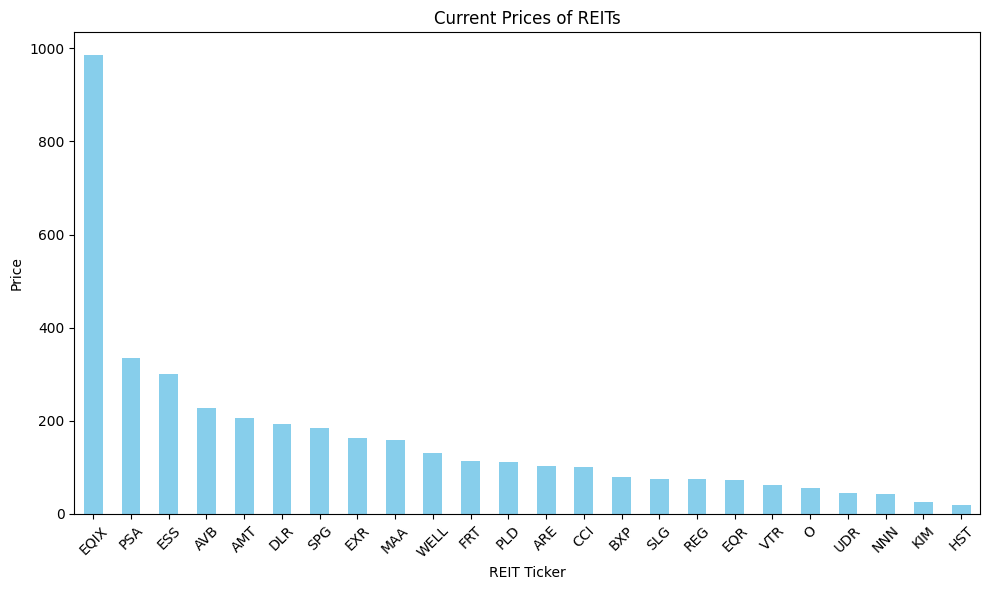

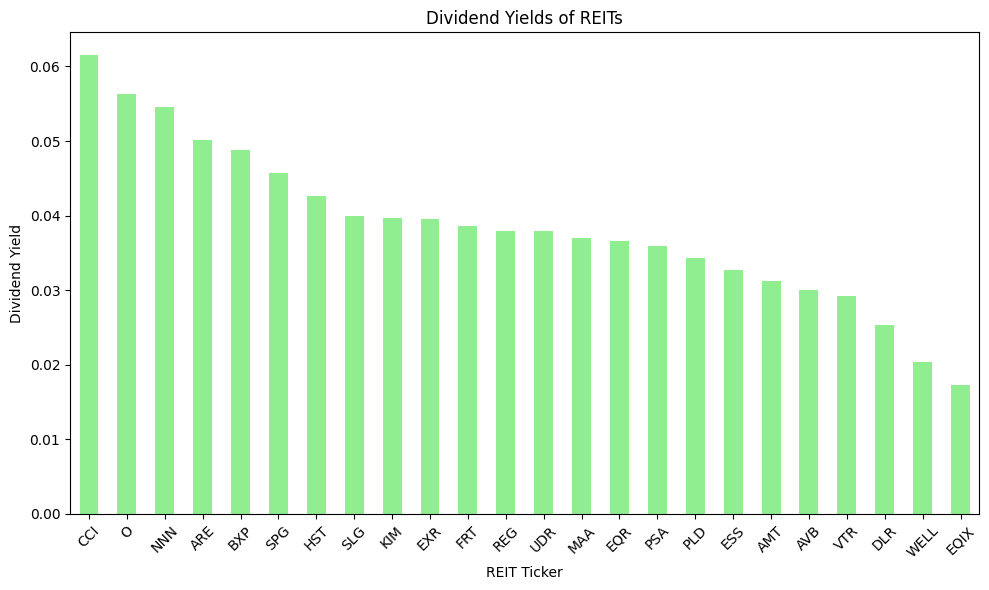

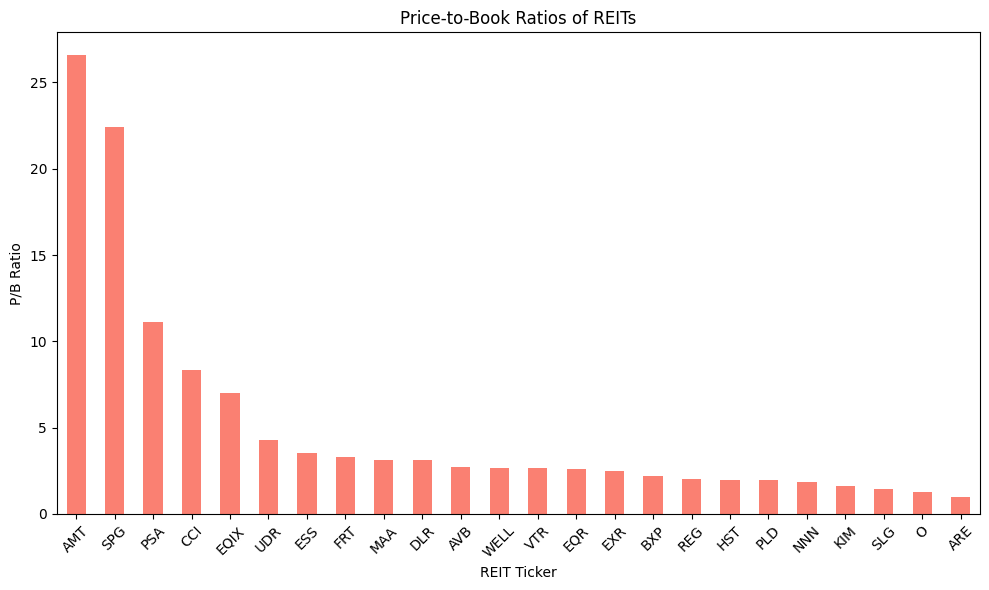

In [4]:
# Plot Current Prices
plt.figure(figsize=(10, 6))
reit_data['Current Price'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Current Prices of REITs')
plt.xlabel('REIT Ticker')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Dividend Yields
plt.figure(figsize=(10, 6))
reit_data['Dividend Yield'].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Dividend Yields of REITs')
plt.xlabel('REIT Ticker')
plt.ylabel('Dividend Yield')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Price-to-Book Ratios
plt.figure(figsize=(10, 6))
reit_data['P/B Ratio'].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Price-to-Book Ratios of REITs')
plt.xlabel('REIT Ticker')
plt.ylabel('P/B Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation Matrix

In [5]:
# Calculate price over median and price over max (95th percentile)
reit_data['Price to Median'] = reit_data['Current Price'] / reit_data['Median Price']
reit_data['Price to Max'] = reit_data['Current Price'] / reit_data['95th Percentile Price']

reit_data.head()

# Select relevant columns for correlation analysis
correlation_matrix = reit_data[['Price to Median', 'Price to Max', 'P/B Ratio']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 Price to Median  Price to Max  P/B Ratio
Price to Median         1.000000      0.843429   0.085366
Price to Max            0.843429      1.000000  -0.032283
P/B Ratio               0.085366     -0.032283   1.000000


## Time Series Forecasting

To predict future REIT prices, we use the ARIMA model for time series forecasting.

In [6]:
# Initialize lists of future predictions
future_predictions = {}

# Loop through each ticker to calculate future predictions
for ticker in reits:
    # Fetch historical data
    reit = yf.Ticker(ticker)
    hist = reit.history(period="max", interval="1mo")

    # Ensure sufficient data is available
    if not hist.empty:
      hist = hist[['Close']].dropna()  # Keep only the 'Close' column
      hist.index = pd.to_datetime(hist.index)
      hist.index = hist.index.date

      # Determine seasonality period
      period = 6 if len(hist) <= 24 else 12

      # Fit ARIMA model
      stepwise_model = auto_arima(
hist, m=period, seasonal=True)

      # Train the model on the entire dataset
      stepwise_model.fit(hist)

      # Predict the next 3 months
      future = stepwise_model.predict(n_periods=3)

      # Store the predictions
      future_predictions[ticker] = {
          'Future Mean': future.mean(),
          'Future Max': future.max(),
          'Future After 3M': future[2]
      }
    else:
      future_predictions[ticker] = {
          'Future Mean': None,
          'Future Max': None,
          'Future After 3M': None
    }

# Convert the predictions dictionary into a DataFrame
future_df = pd.DataFrame.from_dict(future_predictions, orient='index')

# Merge predictions with the existing reit_data DataFrame
reit_data['Future Mean'] = future_df['Future Mean']
reit_data['Future Max'] = future_df['Future Max']
reit_data['Future After 3M'] = future_df['Future After 3M']

## Ranking Formula

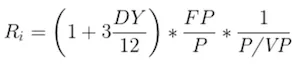

In [ ]:
# Add Ticker column in Dataframe
reit_data.reset_index(inplace=True)
reit_data.rename(columns={'index': 'Ticker'}, inplace=True)

# Creating the final DataFrame with selected columns
final = reit_data[['Ticker',
                   'Current Price',
                   '95th Percentile Price',
                   'P/B Ratio',
                   'Dividend Yield',
                   'Future Mean',
                   'Future Max']].copy()

# Calculating 'p1'
final['p1'] = 1.0 + (3.0 * final['Dividend Yield'] / 12.0)

# Calculating 'p2' based on Future Max and 95th Percentile Price
final['p2'] = np.where(
    final['Future Max'].isnull(),
    final['95th Percentile Price'],
    final['Future Max']
)
final['p2'] = final['p2'] / final['Current Price']

# Calculating rank_0
final['rank_0'] = final['p1'] * final['p2'] / final['P/B Ratio']

# Dropping columns used for intermediate calculations and filtering rows
final.drop(columns=['95th Percentile Price', 'p1', 'p2'], inplace=True)
final = final[~final['rank_0'].isna() & ~np.isinf(final['rank_0'])]

# Sorting and displaying the top 10
top_10 = final.sort_values(by='rank_0', ascending=False).head(10)

# Display the result
print("Top 10 REITs based on rank_0:")
top_10

Top 10 REITs based on rank_0:


,Ticker,Current Price,P/B Ratio,Dividend Yield,Future Mean,Future Max,rank_0
20,ARE,105.43,0.996823,0.0496,104.235756,106.060191,1.021697
13,O,56.06,1.275773,0.0563,55.200925,56.429667,0.800113
22,SLG,73.66,1.441121,0.0403,77.396683,78.274229,0.744801
21,KIM,25.10,1.607841,0.0395,24.588384,25.201847,0.630643
17,HST,18.80,1.957925,0.0432,19.889542,20.256384,0.556254
9,NNN,42.89,1.840931,0.0538,42.786884,43.060909,0.552703
1,PLD,113.79,1.988119,0.0334,113.783411,115.201449,0.513479
14,REG,74.31,2.056170,0.0379,72.208499,74.101221,0.489570
19,BXP,79.23,2.173364,0.0491,80.310331,80.788353,0.474925
11,EXR,163.64,2.475905,0.0395,166.159243,168.184924,0.419210


## Classification By Size

In [ ]:
# Fetch equity values for each REIT
market_cap_values = {}
for ticker in reits:
  # Fetch balance sheet data
  reit = yf.Ticker(ticker)
  info = reit.info

  # Fetch market cap
  market_cap = info.get('marketCap', np.nan)
  market_cap_values[ticker] = market_cap

# Convert market cap data into a DataFrame
market_cap_df = pd.DataFrame.from_dict(market_cap_values, orient='index', columns=['Market Cap'])
market_cap_df.reset_index(inplace=True)
market_cap_df.rename(columns={'index': 'Ticker'}, inplace=True)

# Merge market cap values into the final DataFrame
final = final.merge(market_cap_df, on='Ticker', how='left')

# Define the quantiles and labels
quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['A', 'AA', 'AAA', 'AAAA', 'AAAAA']

# Replace missing market cap values with 0 for quantile calculation
final['Market Cap'].fillna(0, inplace=True)

# Create the 'size' column based on market cap quantiles
final['size'] = pd.qcut(final['Market Cap'], q=quantiles, labels=labels)

KeyError: 'Market Cap'

In [ ]:
# Filter only the "big ones" (top 40%)
# Can edit based on preference
filtered_final = final[final['size'].isin(['AAAA', 'AAAAA'])]

# Sorting and displaying the top 20
filtered_final.sort_values(by='rank_0', ascending=False, inplace=True)
top_5 = filtered_final.head(5)

# Display the result
print("Top 5 REITs based on rank_0 and size:")
top_5

Top 5 REITs based on rank_0 and size:


<ipython-input-47-5c2b98b4daa7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_final.sort_values(by='rank_0', ascending=False, inplace=True)


,Ticker,Current Price,P/B Ratio,Dividend Yield,Future Mean,Future Max,rank_0,Equity,Market Cap_x,size,Market Cap_y
13,O,56.06,1.275773,0.0563,55.200925,56.429667,0.800113,0,49064329216,AAAA,49064329216
1,PLD,113.79,1.988119,0.0334,113.783411,115.201449,0.513479,0,105389449216,AAAAA,105389449216
11,EXR,163.64,2.475905,0.0395,166.159243,168.184924,0.419210,0,36092600320,AAAA,36092600320
16,WELL,132.61,2.703402,0.0201,135.962332,140.075285,0.392691,0,82574917632,AAAAA,82574917632
3,DLR,191.08,3.086316,0.0256,189.684146,190.607267,0.325278,0,64605868032,AAAA,64605868032


In [ ]:
filtered_final

,Ticker,Current Price,P/B Ratio,Dividend Yield,Future Mean,Future Max,rank_0,Market Cap_x,size
13,O,56.06,1.275773,0.0563,55.200925,56.429667,0.800113,49064329216,AAAA
1,PLD,113.79,1.988119,0.0334,113.783411,115.201449,0.513479,105389449216,AAAAA
11,EXR,163.64,2.475905,0.0395,166.159243,168.184924,0.419210,36092600320,AAAA
16,WELL,132.61,2.703402,0.0201,135.962332,140.075285,0.392691,82574917632,AAAAA
3,DLR,191.08,3.086316,0.0256,189.684146,190.607267,0.325278,64605868032,AAAA
4,EQIX,973.80,6.914916,0.0176,987.442789,995.942205,0.148554,93960208384,AAAAA
2,CCI,103.32,8.486242,0.0605,103.182118,104.387291,0.120856,44902666240,AAAA
5,PSA,332.67,11.074604,0.0359,340.642125,348.240472,0.095371,58278133760,AAAA
6,SPG,181.88,22.207571,0.0463,180.821363,182.917120,0.045811,68291031040,AAAAA
0,AMT,209.16,26.839472,0.0312,205.886706,210.117790,0.037721,97738170368,AAAAA
